<a href="https://colab.research.google.com/github/yskim1230/AIB_Section2-PJT_Modeling-Plan/blob/main/Section2_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import os
import sys
import urllib.request
import json
import re



In [15]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [7]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

# 패션의류를 검색한 기기

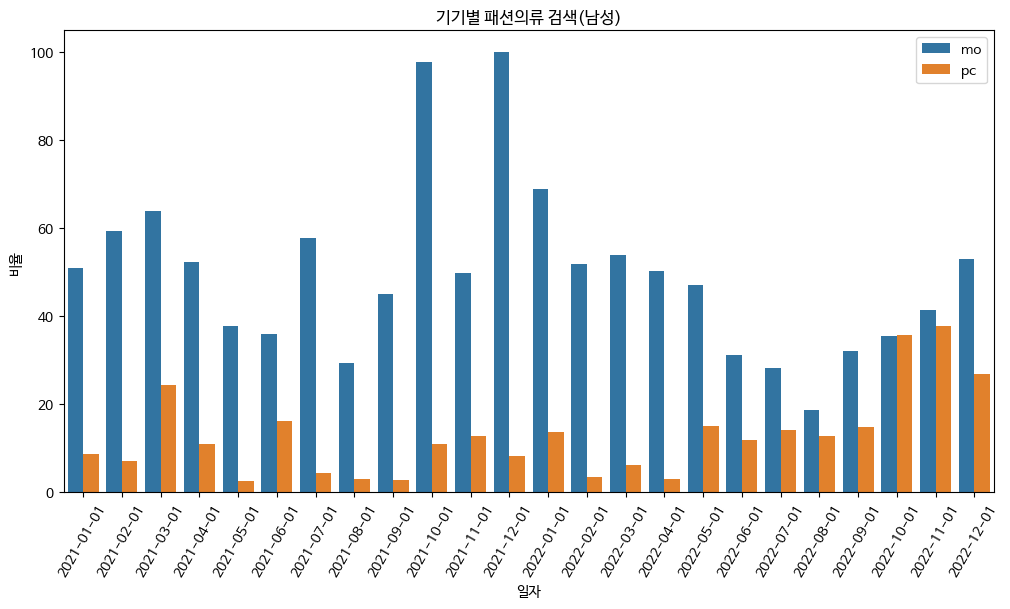

In [9]:
# 네이버 Open API 인증 정보
client_id = "Hewe5vgmlLvWs_ubCDhs"
client_secret = "u8mu84aRwJ"

# 요청 헤더 설정
headers = {
    'Content-Type': 'application/json',
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret
}

# 요청 URL
url = "https://openapi.naver.com/v1/datalab/shopping/category/keyword/device"

# 요청 Body
body = {
    "startDate": "2021-01-01",
    "endDate": "2022-12-31",
    "timeUnit": "month",
    "category": "50000000",
    "keyword": "남성",
    "device": "",
    "gender": "m",
    "ages": []
}

# API 호출
response = requests.post(url, headers=headers, data=json.dumps(body))

# 응답 데이터 확인
data = response.json()

# 데이터프레임화
results = data['results'][0]['data']
df_mdevice = pd.DataFrame(results, columns=['period', 'ratio', 'group'])
df_mdevice['category'] = '패션의류'
df_mdevice['gender'] = '남성'

# 차트 그래프 시각화
fig, ax = plt.subplots(figsize=(12, 6))

# seaborn 막대그래프 시각화
sns.barplot(data=df_mdevice, x='period', y='ratio', hue='group', ax=ax)

# x, y축 라벨링
ax.set_xlabel('일자')
ax.set_ylabel('비율')
plt.xticks(rotation=60)

# 그래프 제목 설정
title = '기기별 패션의류 검색(남성)'
ax.set_title(title)

# 범례 설정
ax.legend()

plt.show()

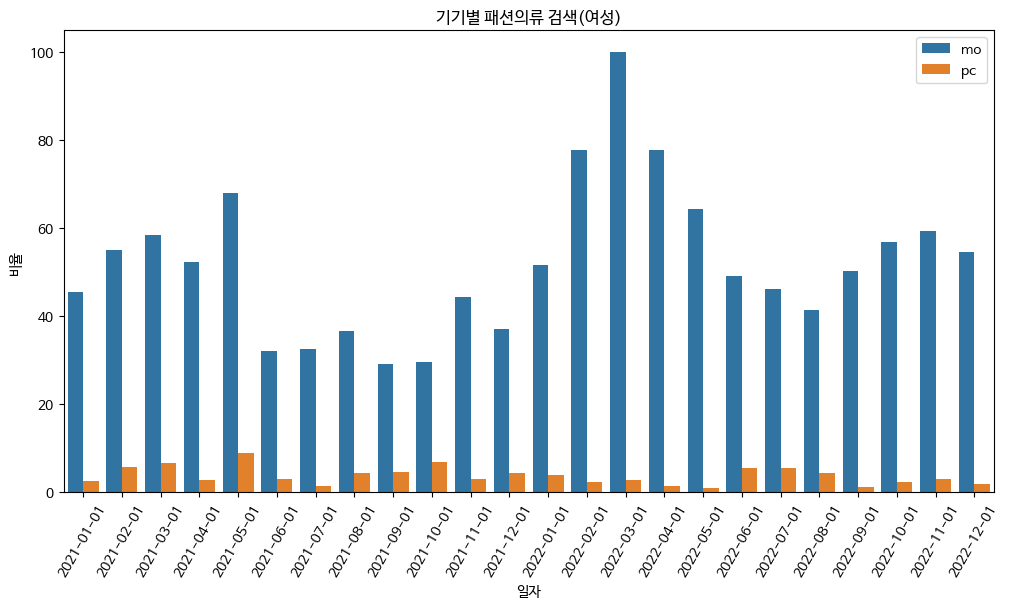

In [10]:

# 네이버 Open API 인증 정보
client_id = "Hewe5vgmlLvWs_ubCDhs"
client_secret = "u8mu84aRwJ"

# 요청 헤더 설정
headers = {
    'Content-Type': 'application/json',
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret
}

# 요청 URL
url = "https://openapi.naver.com/v1/datalab/shopping/category/keyword/device"

# 요청 Body
body = {
    "startDate": "2021-01-01",
    "endDate": "2022-12-31",
    "timeUnit": "month",
    "category": "50000000",
    "keyword": "여성",
    "device": "",
    "gender": "f",
    "ages": []
}

# API 호출
response = requests.post(url, headers=headers, data=json.dumps(body))

# 응답 데이터 확인
data = response.json()

# 데이터프레임화
results = data['results'][0]['data']
df_fdevice = pd.DataFrame(results, columns=['period', 'ratio', 'group'])
df_fdevice['category'] = '패션의류'
df_fdevice['gender'] = '여성'

# 차트 그래프 시각화
fig, ax = plt.subplots(figsize=(12, 6))

# seaborn 막대그래프 시각화
sns.barplot(data=df_fdevice, x='period', y='ratio', hue='group', ax=ax)

# x, y축 라벨링
ax.set_xlabel('일자')
ax.set_ylabel('비율')
plt.xticks(rotation=60)

# 그래프 제목 설정
title = '기기별 패션의류 검색(여성)'
ax.set_title(title)

# 범례 설정
ax.legend()

plt.show()

# 성별로 보는 패션의류 검색비율(모바일)

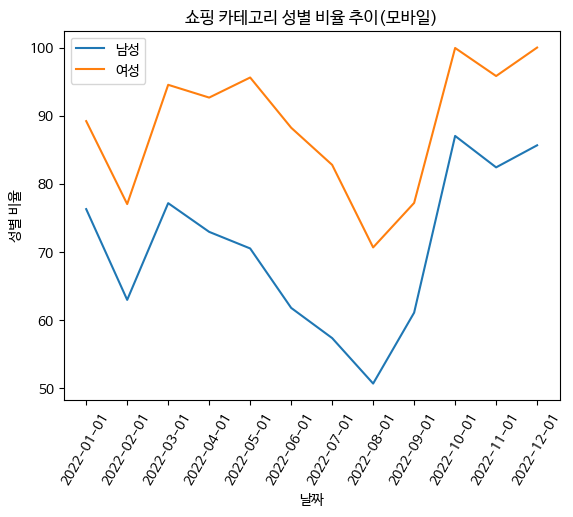

In [13]:

client_id = "Hewe5vgmlLvWs_ubCDhs"
client_secret = "u8mu84aRwJ"

url = "https://openapi.naver.com/v1/datalab/shopping/category/gender"

headers = {
    "Content-Type": "application/json",
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret,
}

body_f = {
    "startDate": "2022-01-01",
    "endDate": "2022-12-31",
    "timeUnit": "month",
    "category": "50000000",
    "device": "mo",
    "gender": "f"
}

body_m = {
    "startDate": "2021-04-01",
    "endDate": "2022-12-31",
    "timeUnit": "month",
    "category": "50000000",
    "device": "mo",
    "gender": "m"
}

response_f = requests.post(url, headers=headers, data=json.dumps(body_f))
result_f = response_f.json()

response_m = requests.post(url, headers=headers, data=json.dumps(body_m))
result_m = response_m.json()

df_f = pd.DataFrame(result_f['results'][0]['data'])
df_f = df_f[['period', 'ratio']]
df_f.columns = ['날짜', '여성비율']

df_m = pd.DataFrame(result_m['results'][0]['data'])
df_m = df_m[['period', 'ratio']]
df_m.columns = ['날짜', '남성비율']

df = pd.merge(df_m, df_f, on='날짜')

#시각화
plt.plot(df['날짜'], df['남성비율'], label='남성')
plt.plot(df['날짜'], df['여성비율'], label='여성')

plt.xlabel('날짜')
plt.ylabel('성별 비율')
plt.title('쇼핑 카테고리 성별 비율 추이(모바일)')
plt.xticks(rotation=60)

plt.legend()
plt.show()

# 네이버 웹문서 검색 api


In [ ]:
client_id = "Hewe5vgmlLvWs_ubCDhs"
client_secret = "u8mu84aRwJ"
query  = urllib.parse.quote(input("검색 질의: "))
idx = 0
display = 100
start = 1 
end = 1000

web_df = pd.DataFrame(columns=("Title", "Link", "Description"))

for start_index in range(start, end, display):
    url = 'https://openapi.naver.com/v1/search/webkr?query=' + query \
          + "&display=" + str(display) \
          + "&start=" + str(start_index)

    request = urllib.request.Request(url)
    request.add_header('X-Naver-Client-Id', "Hewe5vgmlLvWs_ubCDhs")
    request.add_header('X-Naver-Client-Secret', "u8mu84aRwJ")
    response = urllib.request.urlopen(request)
    rescode = response.getcode ()
    if (rescode==200) :
        response_body = response.read()
        response_dict = json.loads(response_body.decode('utf-8'))
        items = response_dict['items']
        for item_index in range(0, len(items)):
            remove_tag = re.compile('<.*>?>')
            title = re.sub(remove_tag, '', items[item_index]['title'])
            link = items[item_index]['link']
            description = re.sub(remove_tag, '', items[item_index]['description'])
            web_df.loc[idx] = [title, link, description]
            idx += 1
    else:
        print("Error Code:" + rescode)

web_df




검색 질의: 패션의류


,Title,Link,Description
0,G마켓 - G마켓 베스트&gt;,https://corners.gmarket.co.kr/Bestsellers?view...,"[데일리앤](주문1위/품절주의) 스텔라 샤 레이스 롱 스커트 49,330원 14,8..."
1,G마켓-여성,https://category.gmarket.co.kr/,"여성,수영복/비치웨어,클럽의상,교복 ..."
2,G마켓 - 롯데아이몰 &gt;,http://minishop.gmarket.co.kr/lottei1/List?Cat...,"(292,725) 언더웨어 (76,533) 진/캐주얼 (57,274) G마켓랭크순..."
3,- 오너클랜,https://www.ownerclan.com/V2/product/search.ph...,카테고리 등록기간 ~ 기간 전체 검색조건 저장 과세/면세 전체 과세 면세 재고여부 ...
4,바보사랑-,http://www.babosarang.co.kr/product/index.php?...,홈 비치웨어 스쿨룩 생활한복 여자라서행복 스트랩 퍼.. 컬러감찰떡 베이직 뒷밴.....
...,...,...,...
144,안전 케어 캠페인’ 진행,http://okfashion.co.kr/detail.php?number=54167,관리를 장려할...
145,- 오피스에버,http://officeever.com/goods/goods_list.php?cat...,카테고리 =카테고리선택= =카테고리선택= =카테고리선택= =카테고리선택= 가격 원 ...
146,- B2C도깨비시장 &gt; BEST 인기상품 1 페이지,http://www.health4989.com/bbs/board.php?bo_tab...,(0) | 컨텐츠샵 BEST...
147,2012년 한국 시장의 트렌드 경향(下),http://okfashion.co.kr/detail.php?number=24314,섬산련은 이 결과를 바탕으로 지난 3일 세미나를 열고 한국 ...


# 네이버 쇼핑 api


In [ ]:
client_id = "Hewe5vgmlLvWs_ubCDhs"
client_secret = "u8mu84aRwJ"
queries = ['원피스','청바지','후드티', '트위드자켓', '티셔츠', '커플잠옷', '블라우스', '니트', '맨투맨','트렌치코트', '가디건', '반바지', '반팔티', '크롭자켓', '스커트']
idx = 0
display = 100
sort = 'dsc'
start = 1
end = 1000

shop_df = pd.DataFrame(columns=("Title", "Link", "Image", "Low price", "High Price", "Mall Name", "Product Id", "Product Type", "Maker", "Brand", "category1", "category2","category3","category4"))

for query in queries:
    for start_index in range(start, end, display):
        url = 'https://openapi.naver.com/v1/search/shop?query=' + urllib.parse.quote(query) \
              + "&display=" + str(display) \
              + "&start=" + str(start_index)

        request = urllib.request.Request(url)
        request.add_header('X-Naver-Client-Id', client_id)
        request.add_header('X-Naver-Client-Secret', client_secret)
        response = urllib.request.urlopen(request)
        rescode = response.getcode()
        if (rescode == 200):
            response_body = response.read()
            response_dict = json.loads(response_body.decode('utf-8'))
            items = response_dict['items']
            for item_index in range(0, len(items)):
                remove_tag = re.compile('<.*>?>')
                title = re.sub(remove_tag, '', items[item_index]['title'])
                link = items[item_index]['link']
                image = items[item_index]['image']
                low_price = items[item_index]['lprice']
                high_price = items[item_index]['hprice']
                mall_name = items[item_index]['mallName']
                product_id = items[item_index]['productId']
                product_type = items[item_index]['productType']
                maker = items[item_index]['maker']
                brand = items[item_index]['brand']
                category1 = items[item_index]['category1']
                category2 = items[item_index]['category2']
                category3 = items[item_index]['category3']
                category4 = items[item_index]['category4']
                shop_df.loc[idx] = [title, link, image, low_price, high_price, mall_name, product_id, product_type, maker, brand, category1, category2, category3 , category4]
                idx += 1
        else:
            print("Error Code:" + rescode)


In [ ]:
shop_df

,Title,Link,Image,Low price,High Price,Mall Name,Product Id,Product Type,Maker,Brand,category1,category2,category3,category4
0,봄 여름 77,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_847995...,10000,,제이X제곱,84799534459,2,,,패션의류,여성의류,원피스,
1,김서룡 시그니처 밴딩 볼륨,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_385615...,92480,,네이버,38561513007,1,,,패션의류,여성의류,원피스,
2,루아 패턴 롱 휴가 바캉스 루즈핏 호캉스 에스닉 여행 필수,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_825881...,18800,,썸메모리,82588186197,2,,,패션의류,여성의류,원피스,
3,봄 레이어드 롱 나시,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_385386...,25000,,네이버,38538676278,1,,,패션의류,여성의류,원피스,
4,써스데이아일랜드 여성 롱기장의 솔리드 T214MOP260W,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_386931...,110580,,네이버,38693185693,1,,써스데이아일랜드,패션의류,여성의류,원피스,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,플라스틱아일랜드 23여름이밴드 샤 PP2WS301,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_385444...,44370,,네이버,38544422965,1,아이올리,플라스틱아일랜드,패션의류,여성의류,스커트,
14996,나이스클랍 ADD A라인 샤 배색 A222PWS305,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_339537...,95900,,네이버,33953709682,1,,나이스클랍,패션의류,여성의류,스커트,
14997,로엠 Roem 시그니처 샤이닝 샤 RMWHD12S74,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_378249...,159000,,네이버,37824902202,1,,로엠,패션의류,여성의류,스커트,
14998,포커스 면 펀칭 레이스 롱 FM2E7SK0485,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_323304...,20250,,네이버,32330404165,1,,포커스,패션의류,여성의류,스커트,


In [ ]:
shop_df.to_csv('naver_shop.csv', index=False)